In [29]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer


In [30]:
df = pd.read_csv("11 titanic.csv",usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875
...,...,...,...
413,0,NaN,8.0500
414,1,39.0,108.9000
415,0,38.5,7.2500
416,0,NaN,8.0500


In [31]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [32]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [10]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

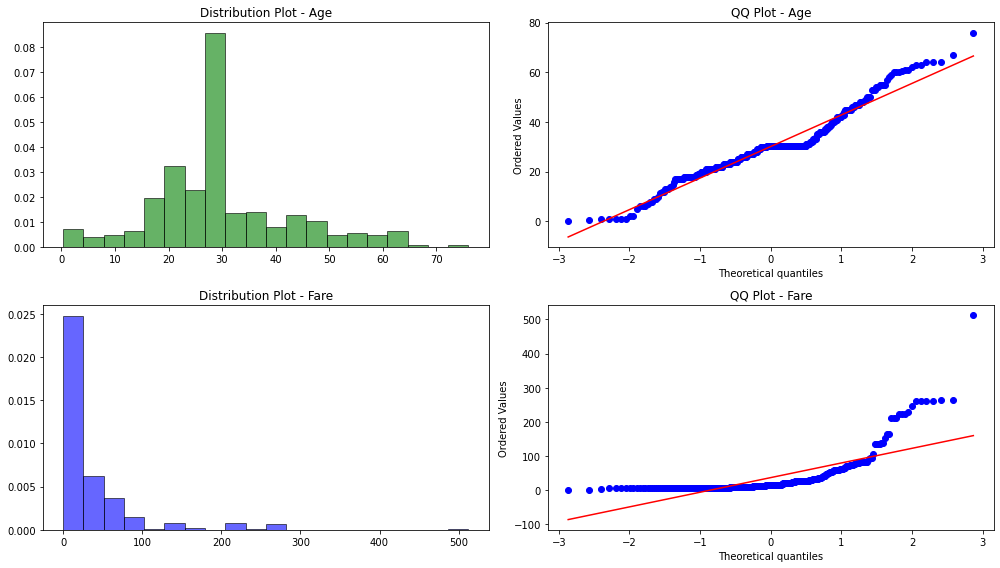

In [13]:
# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Plot the first distribution plot for Age
axs[0, 0].hist(X_train['Age'], bins=20, density=True, alpha=0.6, color='g', edgecolor='black')
axs[0, 0].set_title('Distribution Plot - Age')

# Plot the first QQ plot for Age
stats.probplot(X_train['Age'], dist='norm', plot=axs[0, 1])
axs[0, 1].set_title('QQ Plot - Age')

# Plot the second distribution plot for Fare
axs[1, 0].hist(X_train['Fare'], bins=20, density=True, alpha=0.6, color='b', edgecolor='black')
axs[1, 0].set_title('Distribution Plot - Fare')

# Plot the second QQ plot for Fare
stats.probplot(X_train['Fare'], dist='norm', plot=axs[1, 1])
axs[1, 1].set_title('QQ Plot - Fare')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# Training models before funtion transformer

In [34]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6071428571428571
Accuracy DT 0.5357142857142857


# Log Transformer

In [35]:
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [38]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6190476190476191
Accuracy DT 0.5595238095238095


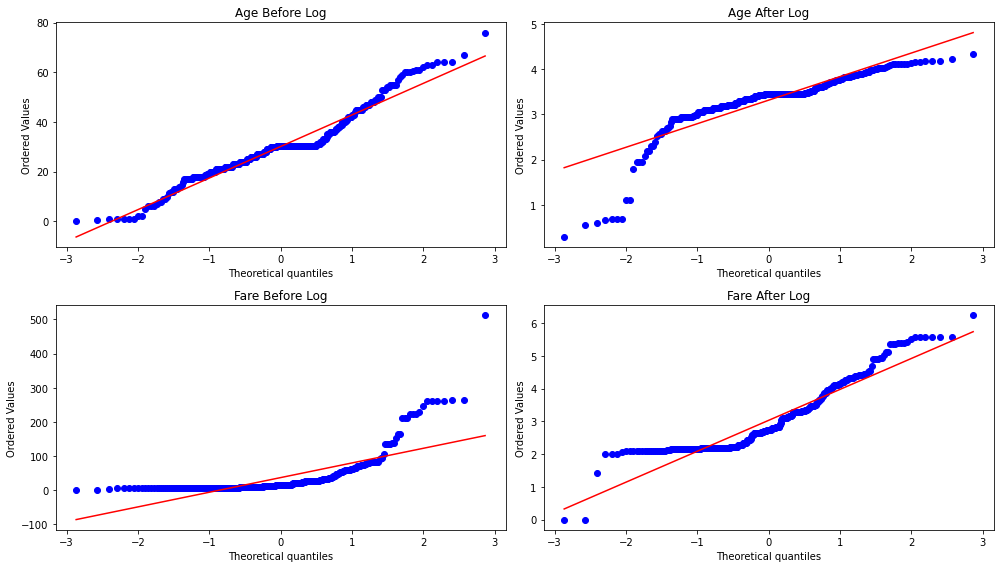

In [39]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Plot the first QQ plot for Age Before Log
stats.probplot(X_train['Age'], dist="norm", plot=axs[0, 0])
axs[0, 0].set_title('Age Before Log')

# Plot the second QQ plot for Age After Log
stats.probplot(X_train_transformed['Age'], dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('Age After Log')

# Plot the third QQ plot for Fare Before Log
stats.probplot(X_train['Fare'], dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('Fare Before Log')

# Plot the fourth QQ plot for Fare After Log
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('Fare After Log')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# Reciprocal Transformer

In [40]:
# Define the reciprocal transformation function
def reciprocal_transform(X):
    # Add a small constant value to avoid zero division
    X = X + 1e-6  # You can adjust the constant value as needed
    return 1 / X

# Create the FunctionTransformer
trf = FunctionTransformer(func=reciprocal_transform)

# Apply the transformation to the training and test data
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

# Now you can proceed with fitting your classifiers
clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

# Print the accuracies
print("Accuracy LR:", accuracy_score(y_test, y_pred))
print("Accuracy DT:", accuracy_score(y_test, y_pred1))

Accuracy LR: 0.6071428571428571
Accuracy DT: 0.5476190476190477


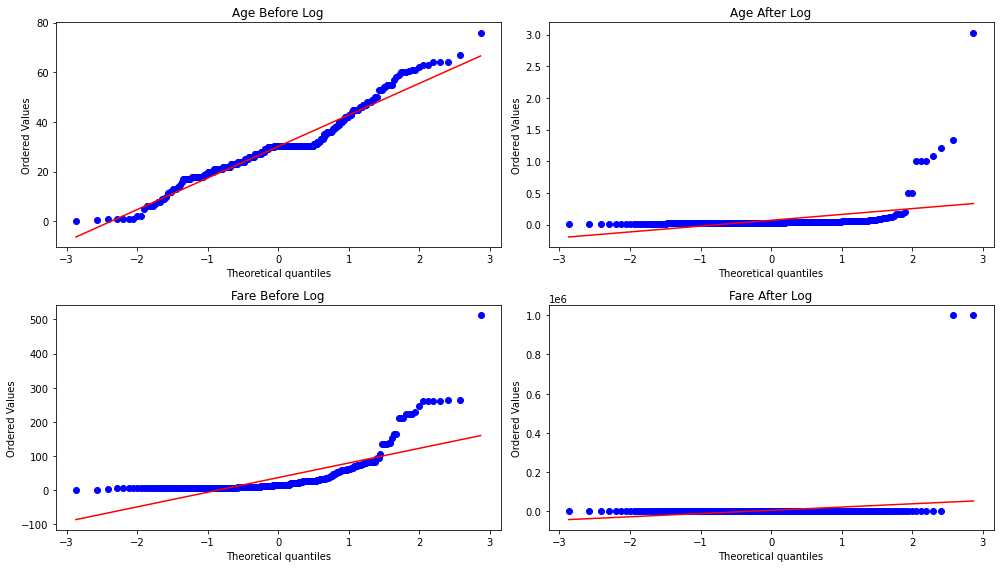

In [41]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Plot the first QQ plot for Age Before Log
stats.probplot(X_train['Age'], dist="norm", plot=axs[0, 0])
axs[0, 0].set_title('Age Before Log')

# Plot the second QQ plot for Age After Log
stats.probplot(X_train_transformed['Age'], dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('Age After Log')

# Plot the third QQ plot for Fare Before Log
stats.probplot(X_train['Fare'], dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('Fare Before Log')

# Plot the fourth QQ plot for Fare After Log
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('Fare After Log')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# Square Transformer

In [42]:
# Define the square transformation function
def square_transform(X):
    return X ** 2

# Create the FunctionTransformer
trf_square = FunctionTransformer(func=square_transform)

# Apply the transformation to the 'Fare' feature in the training and test data
X_train_transformed_fare = X_train['Fare'].values.reshape(-1, 1)  # Reshape to ensure 2D array
X_test_transformed_fare = X_test['Fare'].values.reshape(-1, 1)    # Reshape to ensure 2D array
X_train_transformed_fare = trf_square.fit_transform(X_train_transformed_fare)
X_test_transformed_fare = trf_square.transform(X_test_transformed_fare)

# Now you can proceed with fitting your classifiers using the transformed 'Fare' feature
clf.fit(X_train_transformed_fare, y_train)
clf2.fit(X_train_transformed_fare, y_train)

# Predictions
y_pred = clf.predict(X_test_transformed_fare)
y_pred2 = clf2.predict(X_test_transformed_fare)

# Assess the accuracy
print("Accuracy LR:", accuracy_score(y_test, y_pred))
print("Accuracy DT:", accuracy_score(y_test, y_pred2))

Accuracy LR: 0.6071428571428571
Accuracy DT: 0.6071428571428571


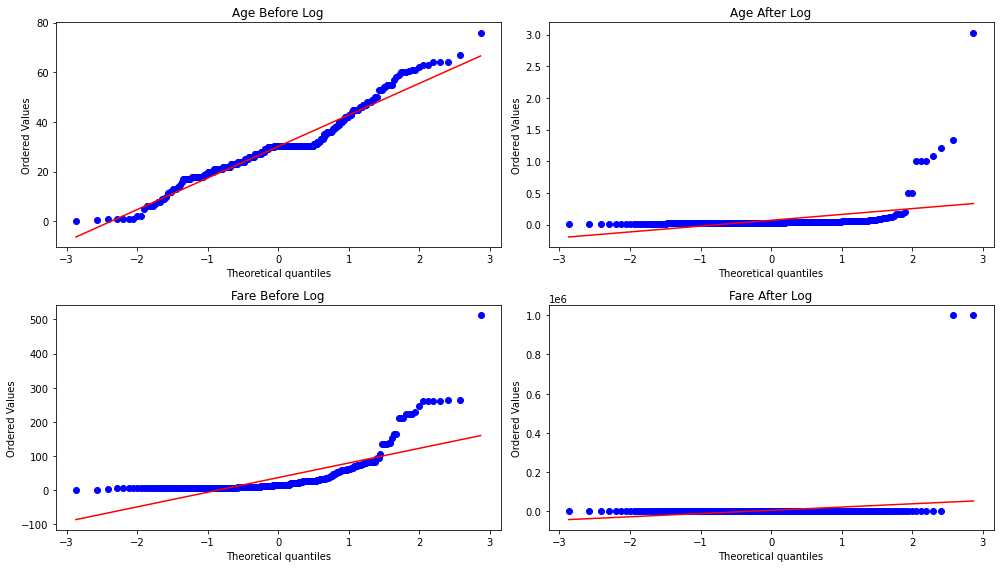

In [26]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Plot the first QQ plot for Age Before Log
stats.probplot(X_train['Age'], dist="norm", plot=axs[0, 0])
axs[0, 0].set_title('Age Before Log')

# Plot the second QQ plot for Age After Log
stats.probplot(X_train_transformed['Age'], dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('Age After Log')

# Plot the third QQ plot for Fare Before Log
stats.probplot(X_train['Fare'], dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('Fare Before Log')

# Plot the fourth QQ plot for Fare After Log
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('Fare After Log')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# Square Root Transformer

In [43]:
# Define the square root transformation function
def square_root_transform(X):
    return np.sqrt(X)

# Create the FunctionTransformer
trf_square_root = FunctionTransformer(func=square_root_transform)

# Apply the transformation to the 'Fare' feature in the training and test data
X_train_transformed_fare = X_train['Fare'].values.reshape(-1, 1)  # Reshape to ensure 2D array
X_test_transformed_fare = X_test['Fare'].values.reshape(-1, 1)    # Reshape to ensure 2D array
X_train_transformed_fare = trf_square_root.fit_transform(X_train_transformed_fare)
X_test_transformed_fare = trf_square_root.transform(X_test_transformed_fare)

# Now you can proceed with fitting your classifiers using the transformed 'Fare' feature
clf.fit(X_train_transformed_fare, y_train)
clf2.fit(X_train_transformed_fare, y_train)

# Predictions
y_pred = clf.predict(X_test_transformed_fare)
y_pred2 = clf2.predict(X_test_transformed_fare)

# Assess the accuracy
print("Accuracy LR:", accuracy_score(y_test, y_pred))
print("Accuracy DT:", accuracy_score(y_test, y_pred2))


Accuracy LR: 0.6190476190476191
Accuracy DT: 0.6071428571428571


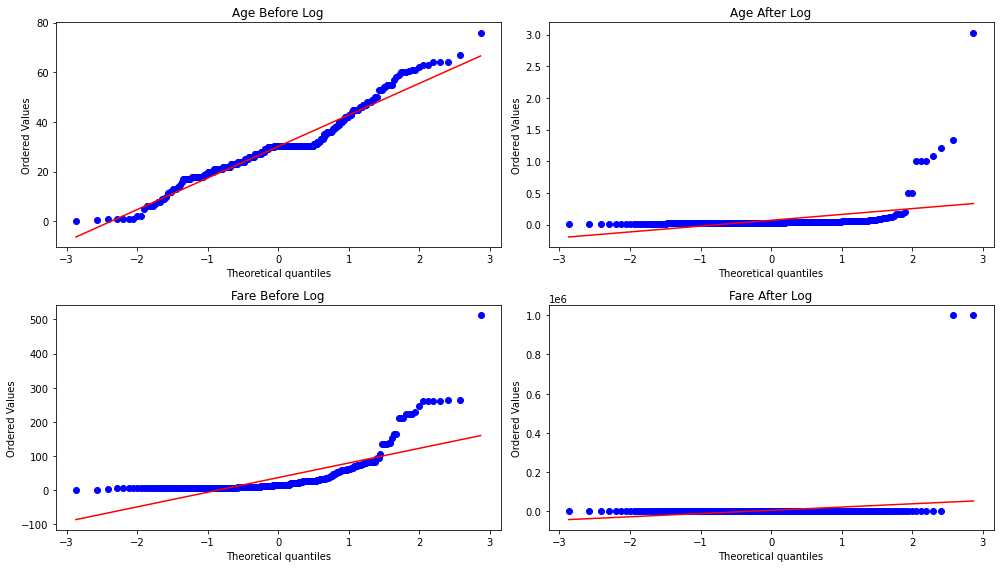

In [28]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Plot the first QQ plot for Age Before Log
stats.probplot(X_train['Age'], dist="norm", plot=axs[0, 0])
axs[0, 0].set_title('Age Before Log')

# Plot the second QQ plot for Age After Log
stats.probplot(X_train_transformed['Age'], dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('Age After Log')

# Plot the third QQ plot for Fare Before Log
stats.probplot(X_train['Fare'], dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('Fare Before Log')

# Plot the fourth QQ plot for Fare After Log
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('Fare After Log')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
